In [ ]:
openapi: 3.0.0
servers: []
info:
  version: "1.0.0"
  title: home-iot-api
  description: The API for the EatBacon IOT project
paths:
  /devices:
    get:
      tags:
        - Device
      description: returns all registered devices
      operationId: getDevices
      parameters:
        - in: query
          name: skip
          description: number of records to skip
          schema:
            type: integer
            format: int32
        - in: query
          name: limit
          description: max number of records to return
          schema:
            type: integer
            format: int32
      responses:
        '200':
          description: All the devices
          content:
            application/json:
              schema:
                type: array
                items:
                  type: string
                  format: uri
                  example: 'http://10.0.0.225:8080'
    post:
      tags:
        - Device
      operationId: register
      responses:
        '200':
          description: successfully registered device
      requestBody:
        content:
          application/json:
            schema:
              $ref: '#/components/schemas/DeviceRegistrationInfo'
  '/lighting/dimmers/{deviceId}/{value}':
    post:
      tags:
        - Z-Wave
      operationId: setDimmer
      parameters:
        - name: deviceId
          in: path
          required: true
          schema:
            type: string
        - name: value
          in: path
          required: true
          schema:
            type: integer
            format: int32
            minimum: 0
            maximum: 100
      responses:
        '200':
          description: response
          content:
            application/json:
              schema:
                $ref: '#/components/schemas/ApiResponse'
      x-swagger-router-controller: ZWave
  '/lighting/dimmers/{deviceId}/{value}/timer/{timeunit}':
    post:
      tags:
        - Z-Wave
      description: sets a dimmer to a specific value on a timer
      operationId: setDimmerTimer
      parameters:
        - name: deviceId
          in: path
          required: true
          schema:
            type: string
        - name: value
          in: path
          required: true
          schema:
            type: integer
            format: int32
        - name: timeunit
          in: path
          required: true
          schema:
            type: integer
            format: int32
        - name: units
          in: query
          required: false
          schema:
            type: string
            enum:
              - seconds
              - minutes
              - milliseconds
            default: milliseconds
      responses:
        '200':
          description: response
          content:
            application/json:
              schema:
                $ref: '#/components/schemas/ApiResponse'
      x-swagger-router-controller: ZWave
  '/lighting/switches/{deviceId}':
    get:
      tags:
        - Z-Wave
      operationId: getSwitchState
      parameters:
        - name: deviceId
          in: path
          required: true
          schema:
            type: string
      responses:
        '200':
          description: response
          content:
            application/json:
              schema:
                $ref: '#/components/schemas/DeviceState'
      x-swagger-router-controller: ZWave
  '/lighting/switches/{deviceId}/{value}':
    post:
      tags:
        - Z-Wave
      operationId: setSwitch
      parameters:
        - name: deviceId
          in: path
          required: true
          schema:
            type: string
        - name: value
          in: path
          required: true
          schema:
            type: string
            enum:
              - true
              - false
      responses:
        '200':
          description: response
          content:
            application/json:
              schema:
                $ref: '#/components/schemas/ApiResponse'
      x-swagger-router-controller: ZWave
  '/lighting/switches/{deviceId}/{value}/timer/{minutes}':
    post:
      tags:
        - Z-Wave
      description: sets a switch to a specific value on a timer
      operationId: setSwitchTimer
      parameters:
        - name: deviceId
          in: path
          required: true
          schema:
            type: string
        - name: value
          in: path
          required: true
          schema:
            type: string
            enum:
              - true
              - false
        - name: minutes
          in: path
          required: true
          schema:
            type: integer
            format: int32
      responses:
        '200':
          description: response
          content:
            application/json:
              schema:
                $ref: '#/components/schemas/ApiResponse'
      x-swagger-router-controller: ZWave
  /lightingSummary:
    get:
      tags:
        - Z-Wave
      operationId: getLightingSummary
      responses:
        '200':
          description: ok
          content:
            application/json:
              schema:
                $ref: '#/components/schemas/LightingSummary'
      x-swagger-router-controller: ZWave
  /temperature:
    get:
      tags:
        - Environment
      operationId: temperatureSummary
      responses:
        '200':
          description: ok
          content:
            application/json:
              schema:
                $ref: '#/components/schemas/TemperatureSummary'
      x-swagger-router-controller: Environment
  '/temperature/forecast/{days}':
    get:
      tags:
        - Environment
      operationId: getForecast
      parameters:
        - name: days
          in: path
          required: true
          schema:
            type: integer
            format: int32
      responses:
        '200':
          description: the forecast
          content:
            application/json:
              schema:
                $ref: '#/components/schemas/ForecastResponse'
      x-swagger-router-controller: Environment
  '/temperature/{zoneId}':
    get:
      tags:
        - Environment
      operationId: getZoneTemperature
      parameters:
        - name: zoneId
          in: path
          required: true
          schema:
            type: string
      responses:
        '200':
          description: Zone temperature
          content:
            application/json:
              schema:
                $ref: '#/components/schemas/TemperatueZoneStatus'
      x-swagger-router-controller: Environment
  '/temperature/{zoneId}/heater':
    get:
      tags:
        - Environment
      description: gets the state of the heater
      operationId: getHeaterState
      parameters:
        - name: zoneId
          in: path
          required: true
          schema:
            type: string
      responses:
        '200':
          description: heater state
          content:
            application/json:
              schema:
                $ref: '#/components/schemas/HeaterState'
      x-swagger-router-controller: Environment
  '/temperature/{zoneId}/heater/{state}':
    post:
      tags:
        - Environment
      description: turns the heater on or off
      operationId: setHeaterState
      parameters:
        - name: zoneId
          in: path
          required: true
          schema:
            type: string
        - name: state
          in: path
          required: true
          schema:
            type: string
            enum:
              - false
              - true
      responses:
        '200':
          description: Status of the operation
          content:
            application/json:
              schema:
                $ref: '#/components/schemas/ApiResponse'
      x-swagger-router-controller: Environment
  /zones:
    get:
      tags:
        - Zones
      operationId: getZones
      responses:
        '200':
          description: ok
          content:
            application/json:
              schema:
                type: array
                items:
                  type: string
      x-swagger-router-controller: Zones
  '/zones/{zoneId}/quiet':
    get:
      tags:
        - Zones
      operationId: quietZone
      parameters:
        - name: zoneId
          in: path
          required: true
          schema:
            type: string
            enum:
              - basement
              - first-floor
              - second-floor
      responses:
        '200':
          description: ok
      x-swagger-router-controller: Zones
components:
  schemas:
    LightingSummary:
      type: object
      properties:
        zones:
          type: array
          items:
            $ref: '#/components/schemas/LightingZone'
        zoneStatus:
          type: array
          items:
            $ref: '#/components/schemas/LightingZoneStatus'
      description: ok
    LightingZone:
      type: object
      properties:
        id:
          type: string
        name:
          type: string
        deviceId:
          type: integer
          format: int32
        deviceType:
          type: string
          enum:
            - dimmer
            - switch
        zone:
          type: string
    LightingZoneStatus:
      type: object
      properties:
        id:
          type: string
        name:
          type: string
        lastUpdate:
          type: string
          format: date-time
        level:
          type: integer
          format: int32
      description: the status of the lighting zone.
    TemperatureSummary:
      type: object
      properties:
        zones:
          type: array
          items:
            $ref: '#/components/schemas/TemperatureZone'
        zoneStatus:
          type: array
          items:
            $ref: '#/components/schemas/TemperatueZoneStatus'
      description: ok
    TemperatureZone:
      type: object
      required:
        - id
        - name
      properties:
        id:
          type: integer
          format: int32
          description: the unique identifier for the zone
        name:
          type: string
        inputPosition:
          type: integer
          format: int32
        outputPosition:
          type: integer
          format: int32
        zone:
          type: string
      description: a single temperature zone
    TemperatueZoneStatus:
      type: object
      required:
        - id
        - timestamp
        - value
      properties:
        id:
          type: string
          description: the unique identifier for the zone
        name:
          type: string
          description: the name of the zone
        value:
          type: number
          format: double
          description: the temperature in the zone
        units:
          type: string
          description: the temperature units
          enum:
            - celsius
            - fahrenheit
          default: fahrenheit
        timestamp:
          type: string
          format: date-time
          description: the timestamp when the temperature was measured
      description: status of a single zone
    ApiResponse:
      type: object
      properties:
        code:
          type: integer
          format: int32
        message:
          type: string
          example: everything is ok
    HeaterState:
      type: object
      properties:
        id:
          type: string
        state:
          type: string
    DeviceState:
      type: object
      properties:
        id:
          type: string
        name:
          type: string
        lastUpdate:
          type: string
          format: date-time
        level:
          type: integer
          format: int32
    ForecastResponse:
      type: object
      properties:
        city:
          $ref: '#/components/schemas/City'
        values:
          type: array
          items:
            $ref: '#/components/schemas/Forecast'
    Forecast:
      type: object
      properties:
        date:
          type: string
          format: date-time
        pressure:
          type: number
          format: double
        humidity:
          type: integer
          format: int32
        windSpeed:
          type: number
          format: double
        clouds:
          type: integer
          format: int32
        temperature:
          $ref: '#/components/schemas/ForecastTemperature'
        weather:
          $ref: '#/components/schemas/WeatherForecast'
    City:
      type: object
      properties:
        id:
          type: integer
          format: int64
        name:
          type: string
        lat:
          type: number
          format: double
        lon:
          type: number
          format: double
        country:
          type: string
    ForecastTemperature:
      type: object
      properties:
        low:
          type: number
          format: double
        high:
          type: number
          format: double
        morning:
          type: number
          format: double
        day:
          type: number
          format: double
        evening:
          type: number
          format: double
        night:
          type: number
          format: double
    WeatherForecast:
      type: object
      properties:
        summary:
          type: string
        description:
          type: string
        icon:
          type: string
    DeviceRegistrationInfo:
      type: object
      properties:
        uri:
          type: string
          format: uri
          example: 'http://10.0.0.220:8080'
        id:
          type: string
          format: uuid
          example: 0729a580-2240-11e6-9eb5-0002a5d5c51b

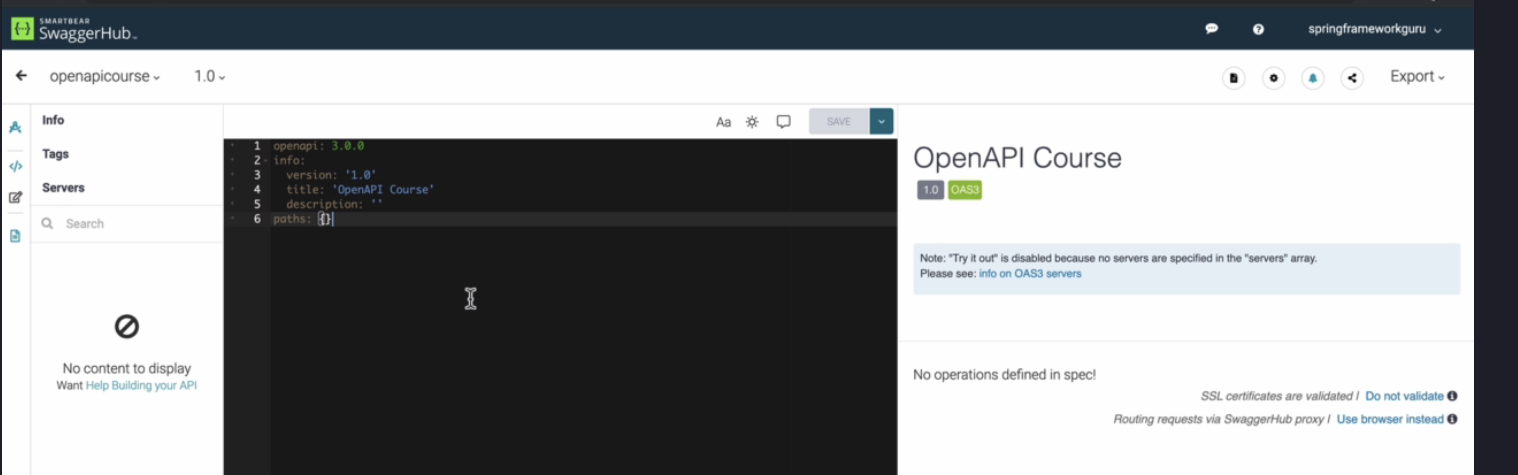

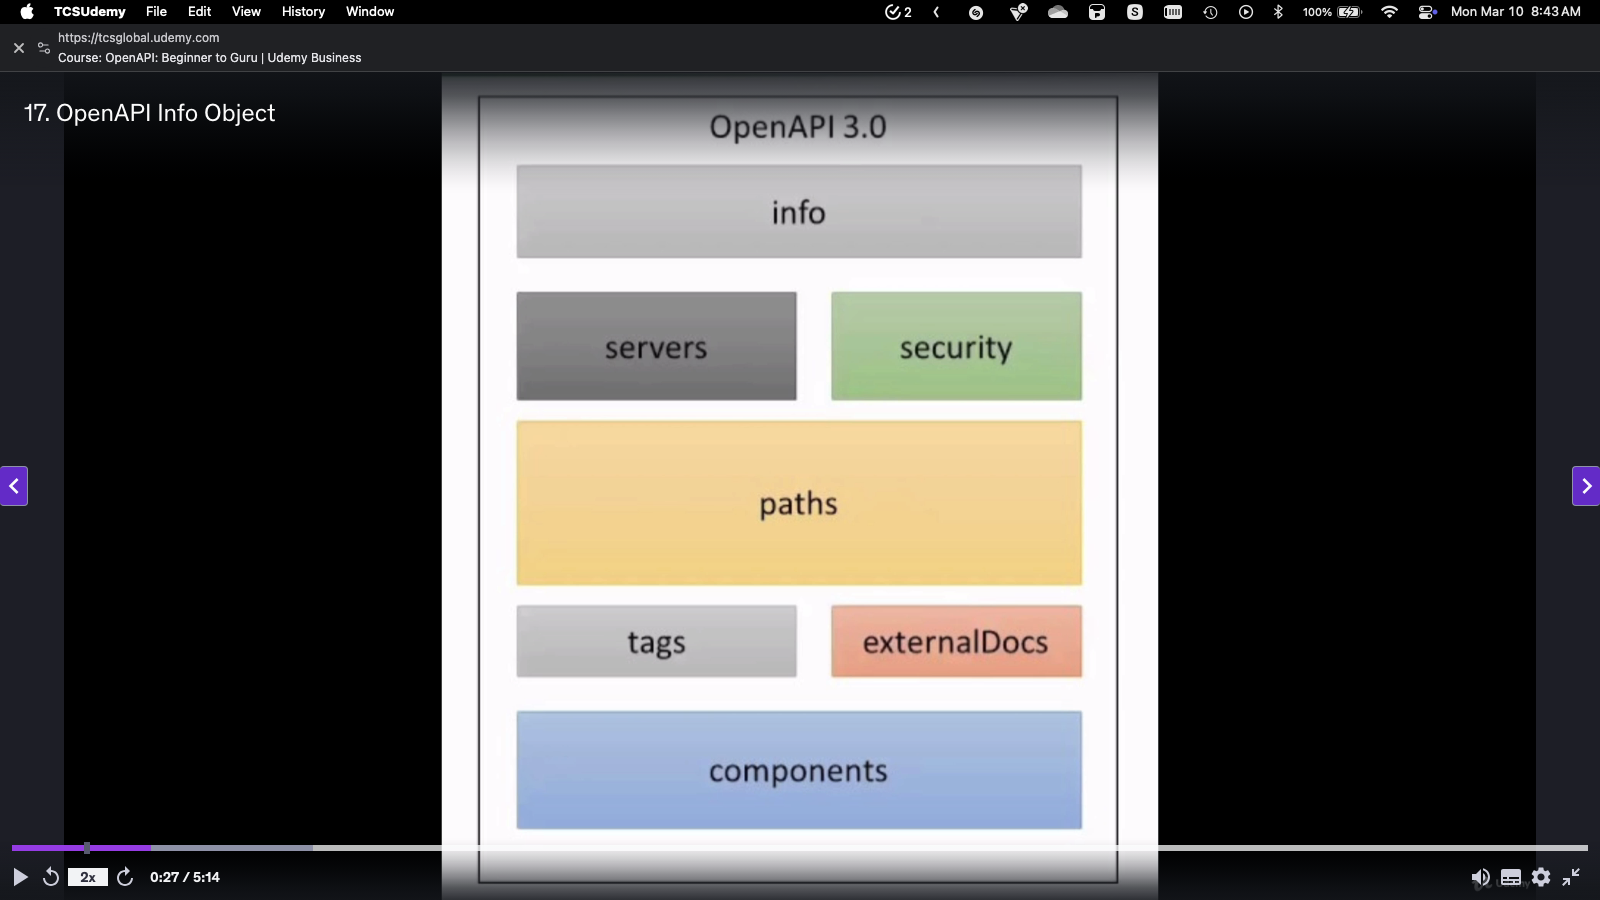

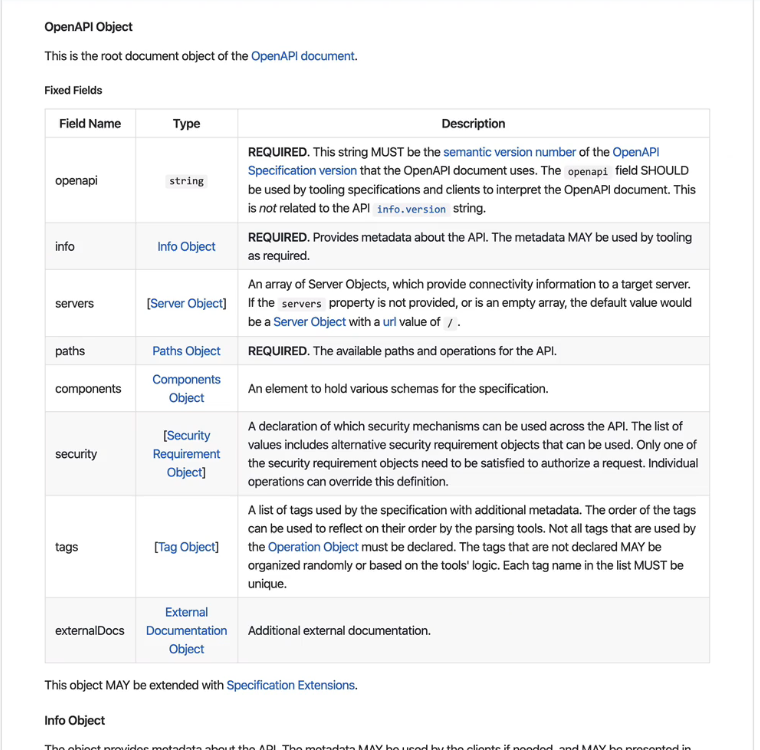
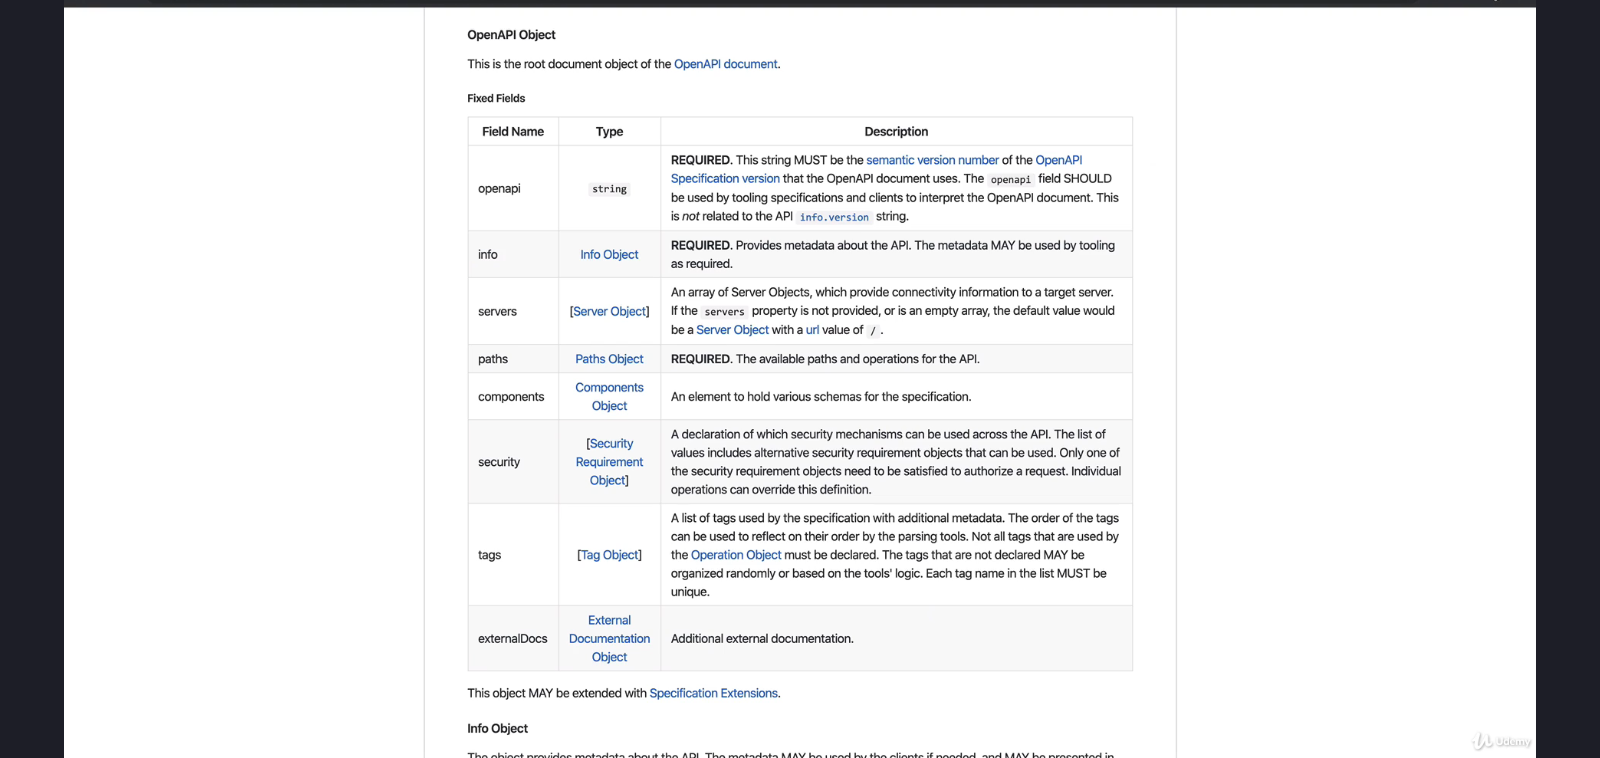

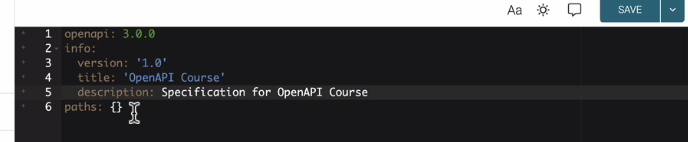

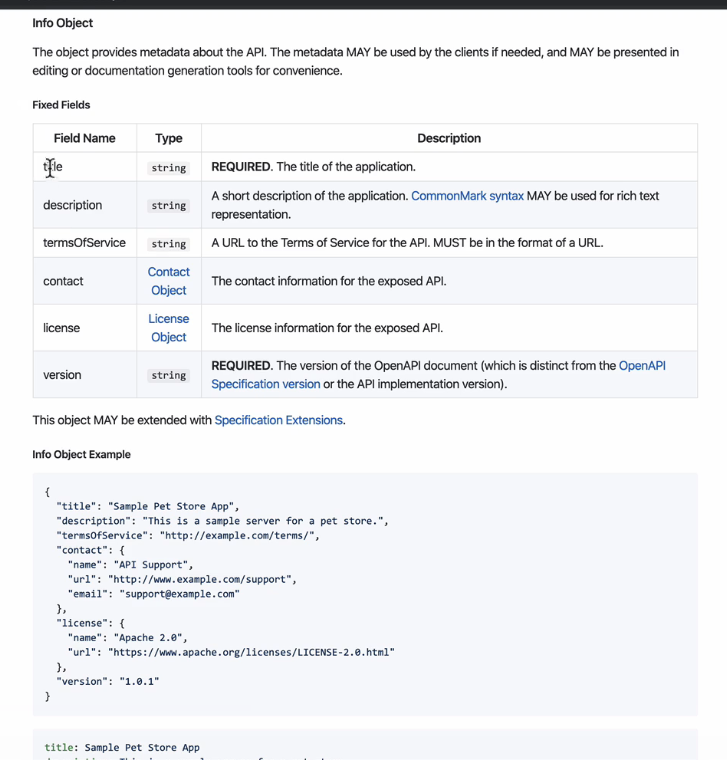

ctrl + space

contact object

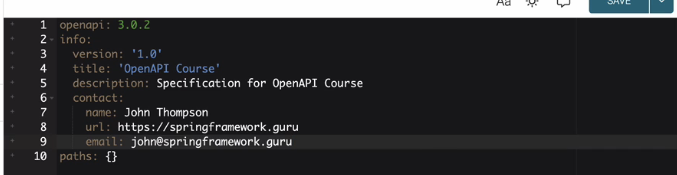

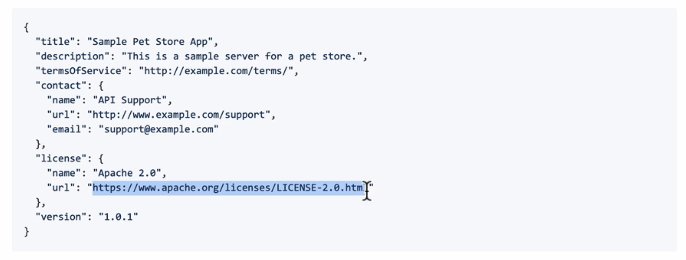

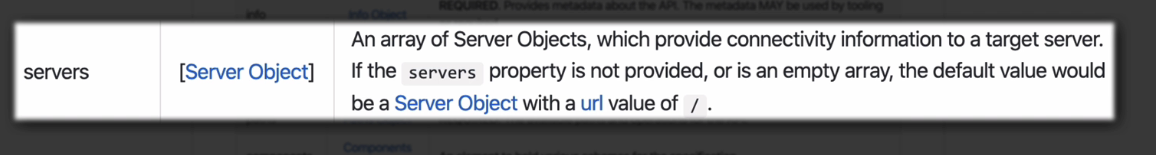

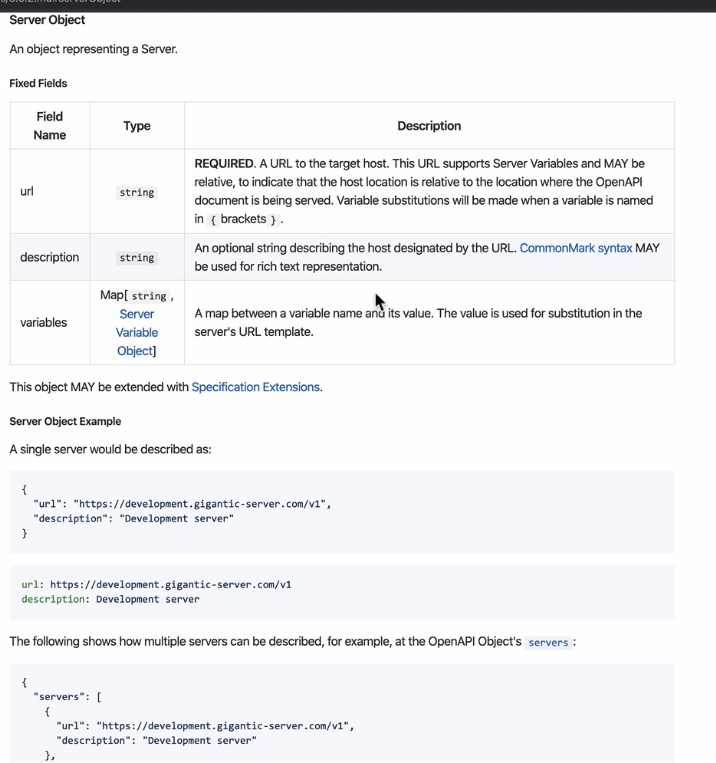

doubt

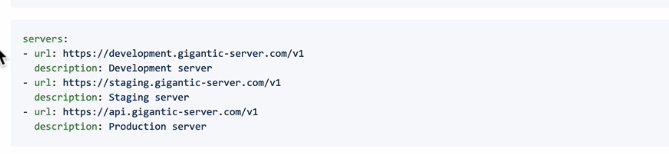

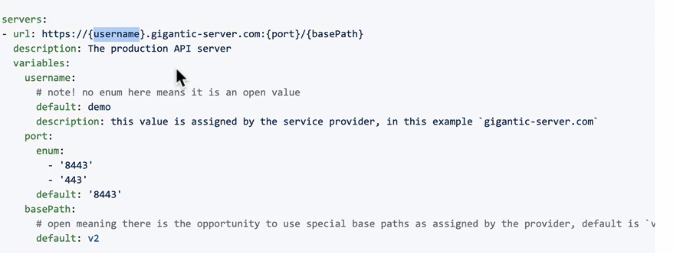

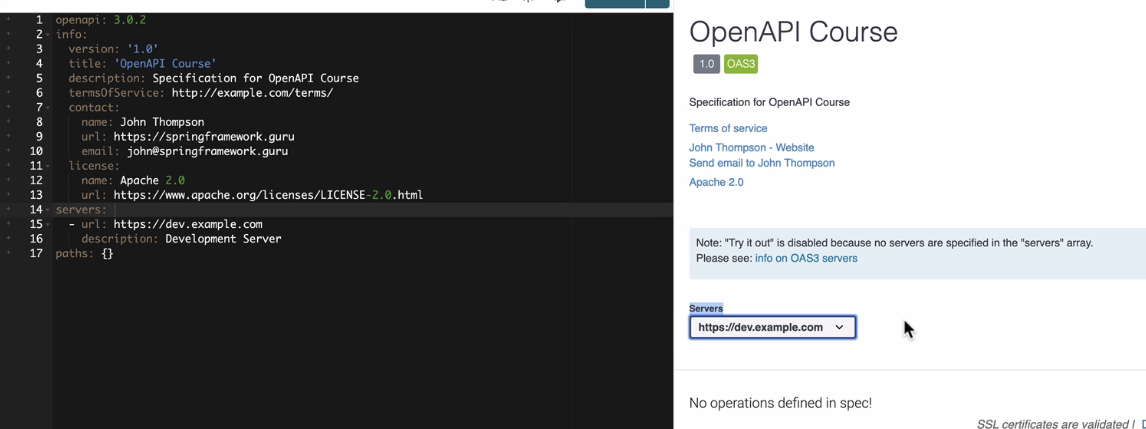